In [1]:
import torch
import numpy as np
from functools import partial
import e3nn
from e3nn.kernel import Kernel
from e3nn.radial import GaussianRadialModel
from e3nn.non_linearities import rescaled_act

In [2]:
import matplotlib 
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [27]:
torch.set_default_dtype(torch.float64)

Rs = [(1, 1)]
max_radius = 2.0
number_of_basis = 5
radial_layers = 2
sp = rescaled_act.ShiftedSoftplus(beta=0.5)
RadialModel = partial(GaussianRadialModel, max_radius=max_radius,
                      number_of_basis=number_of_basis, h=10,
                      L=radial_layers, act=sp)
K = Kernel(Rs, Rs, RadialModel)

In [28]:
K.list_of_l_filters

[0, 1, 2]

In [29]:
from spherical import VisualizeKernel

In [30]:
vk = VisualizeKernel(K)

In [35]:
r, f = vk.plot_data_on_grid(5, n=20)
print(r.shape, f.shape)

torch.Size([8000, 3])
torch.Size([8000, 3]) torch.Size([8000, 9])


In [36]:
i = 4
plot_max = float(torch.max(f[:,i].abs()))

In [39]:
fig = go.Figure(data=go.Volume(
    x=r[:,0],
    y=r[:,1],
    z=r[:,2],
    value=f[:,i],
    isomin=-plot_max,
    isomax=plot_max,
    opacity=0.3, # needs to be small to see through all surfaces
    surface_count=40, # needs to be a large number for good volume rendering
    colorscale='RdBu'))
fig.show()

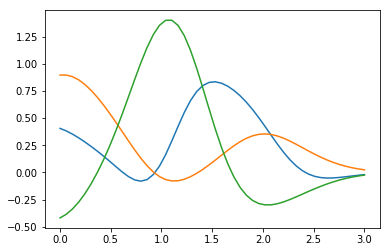

In [10]:
x = torch.linspace(0, 3., 50)
y = K.R(x).detach()
plt.plot(x, y[:, 0])
plt.plot(x, y[:, 1])
plt.plot(x, y[:, 2])